In [2]:
import numpy as np
import pandas as pd

In [24]:
# Linear Regression using closed form
class LinearRegression:
    def fit(self, X, y):
    
        temp = np.ones((X.shape[0], 1))
        self.X = np.hstack((temp, X))
        self.y = y
        
        part1 = np.dot(self.y.T, self.X)
        part2 = np.dot(self.X.T, self.X)
        
        self.theta = np.dot(part1, np.linalg.pinv(part2))
        
        print("Model Fitted")
        
    def predict(self, X):
        temp = np.ones((X.shape[0], 1))
        X = np.hstack((temp, X))
        
        predicted = np.dot(X, self.theta.T)
        
        return predicted


### Loading and handling data

In [25]:
df = pd.read_csv("kc_house_data.csv")

df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [26]:
y = np.array(df["price"]).reshape(-1, 1)

X = df["sqft_living"]

X = np.array(X).reshape(-1, 1)

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

Model Fitted


In [28]:
y_test[15:20]

array([[1070000.],
       [ 800000.],
       [ 795127.],
       [ 355000.],
       [ 474000.]])

In [29]:
model.predict(X_test[15:20])

array([[1105596.07730551],
       [ 359293.17038866],
       [1169170.02863547],
       [ 362057.25522909],
       [ 505789.6669316 ]])

In [30]:
import matplotlib.pyplot as plt

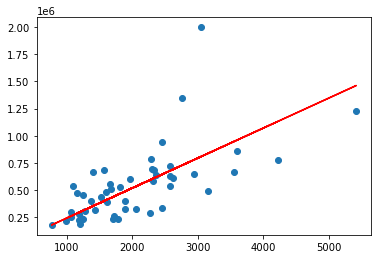

In [31]:
plt.plot()
plt.scatter(X[:50], y[:50])
plt.plot(X[:50], model.predict(X[:50]),color='red')